In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\sahil\Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
print('Shape of dataset',df.shape)

Shape of dataset (400, 9)


In [9]:
print('information about dataset',df.size)

information about dataset 3600


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


C:\Users\Dell\AppData\Local\Temp/ipykernel_16052/2833712814.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr,dtype=np.bool)


<AxesSubplot:>

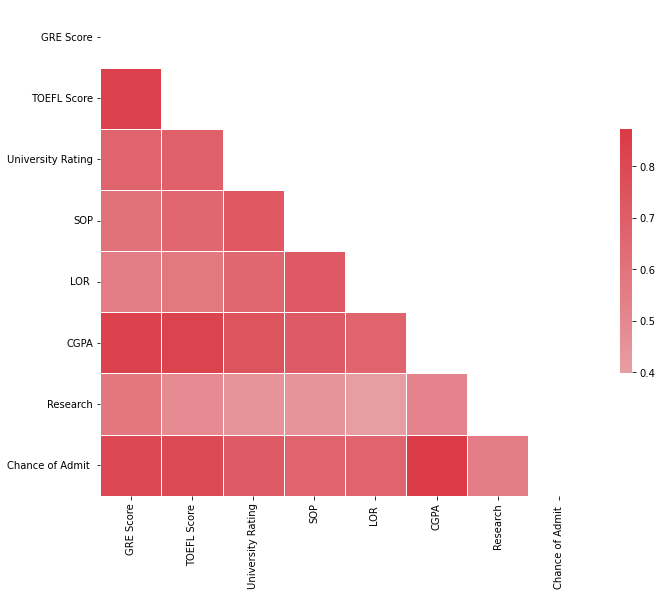

In [14]:
corr=df.iloc[:,1:9].corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,x=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [15]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

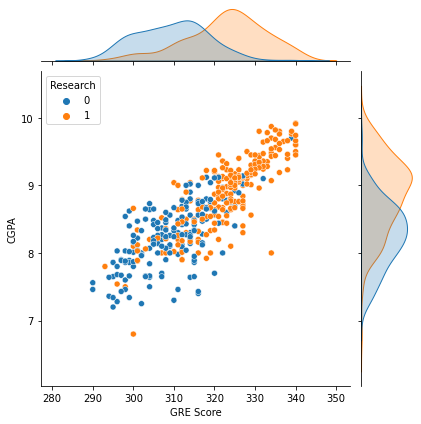

In [17]:
sns.jointplot(x='GRE Score',y='CGPA',data=df,hue='Research')

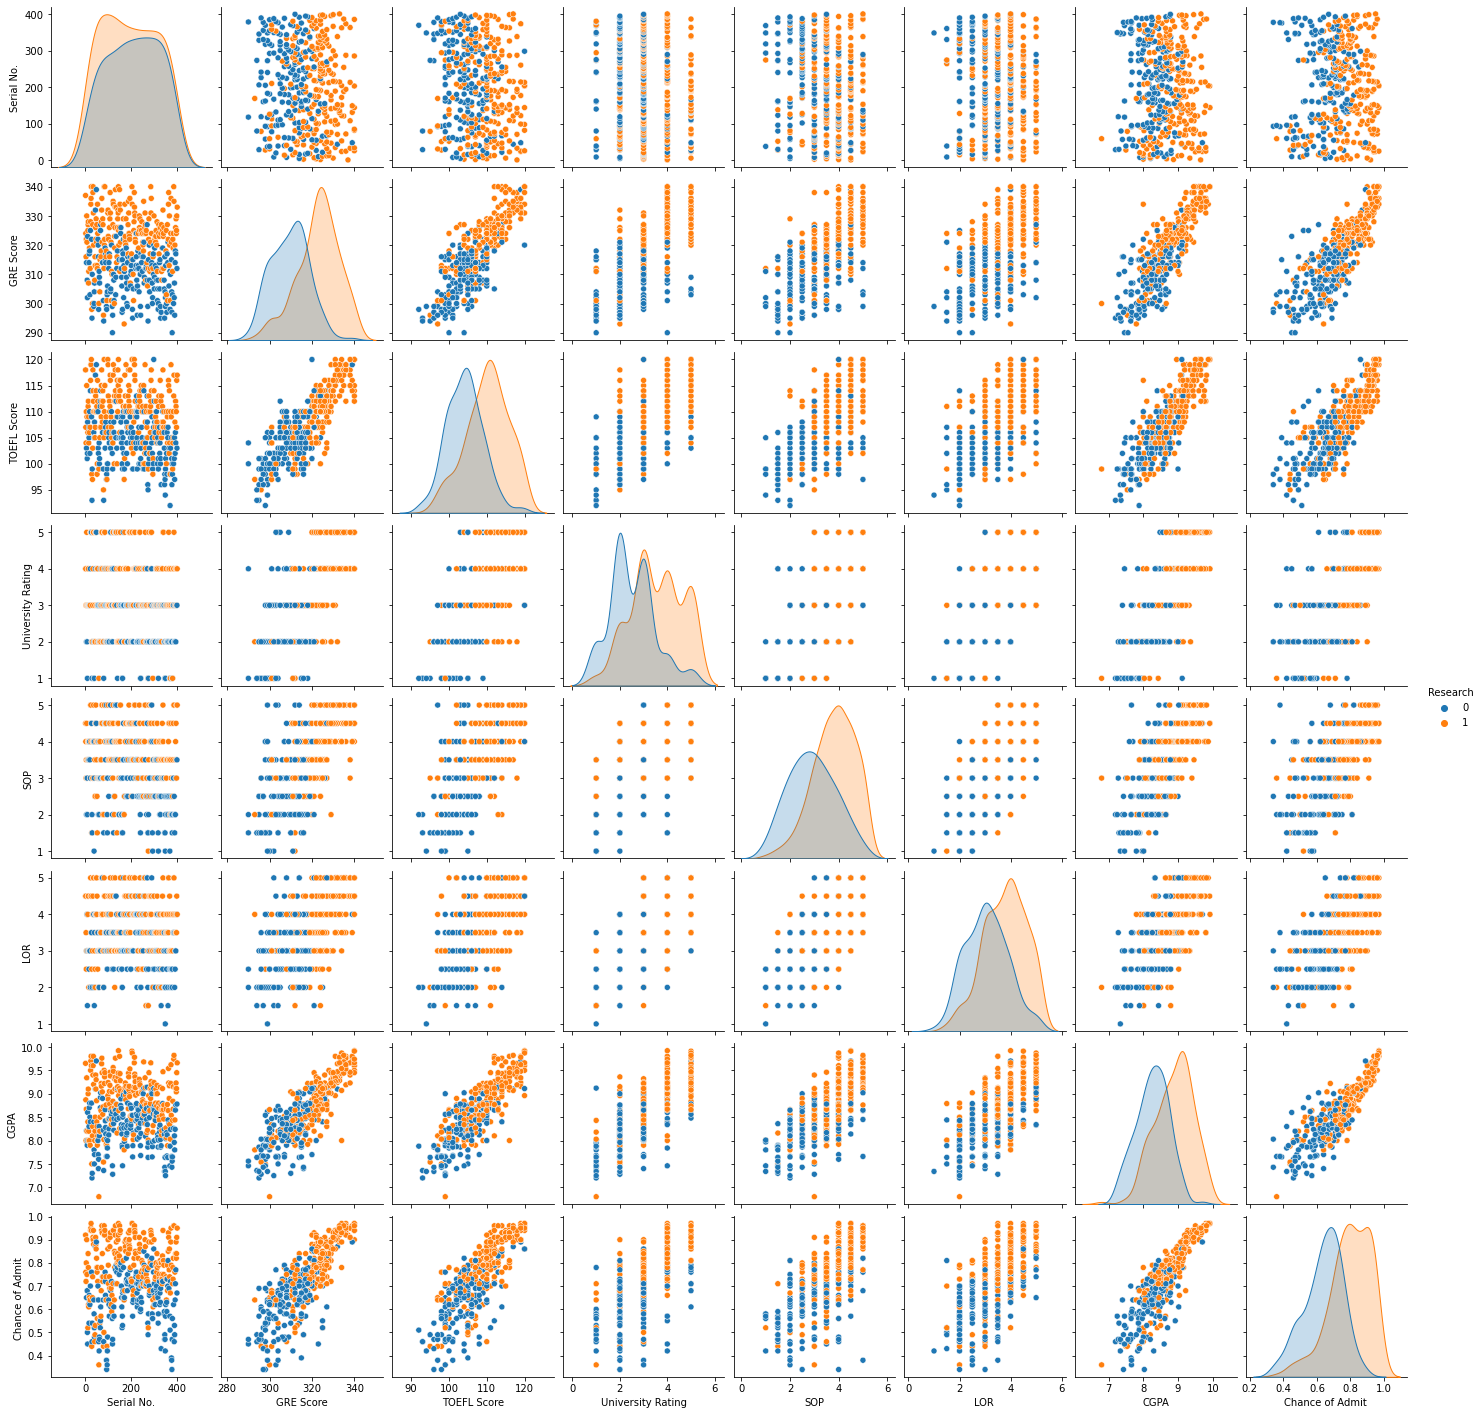

In [18]:
sns.pairplot(df,hue='Research')

In [19]:
df_scale=df.copy()
scaler=preprocessing.StandardScaler()
columns=df.columns[1:7]
df_scale[columns]=scaler.fit_transform(df_scale[columns])
df_scale.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1,0.92
1,2,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1,0.76
2,3,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1,0.72
3,4,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1,0.80
4,5,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0,0.65


In [25]:
iner=[]
for k in range(1,9):
    model=KMeans(n_clusters=k)
    model.fit(df_scale.iloc[:,1:])
    iner.append(model.inertia_)

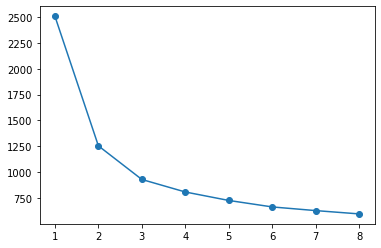

In [28]:
plt.plot(range(1,9),iner,'-o')

In [30]:
model=KMeans(n_clusters=3)
model.fit(df_scale.iloc[:,2:9])
df_scale['cluster']=model.predict(df_scale.iloc[:,2:9])
df_scale.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,cluster
0,1,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1,0.92,1
1,2,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1,0.76,1
2,3,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1,0.72,0
3,4,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1,0.80,0
4,5,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0,0.65,2


<AxesSubplot:>

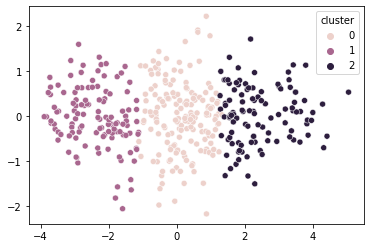

In [31]:
model_pca=PCA()
pca_features=model_pca.fit_transform(df_scale.iloc[:,2:9])
xs=pca_features[:,0]
ys=pca_features[:,1]
sns.scatterplot(x=xs,y=ys,hue='cluster',data=df_scale)

<AxesSubplot:xlabel='cluster', ylabel='Chance of Admit '>

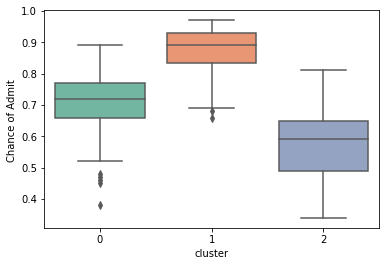

In [34]:
sns.boxplot(x='cluster',y="Chance of Admit ",data=df_scale,palette='Set2')

In [35]:
centroids=model.cluster_centers_
df_scale.iloc[:,1:10].groupby(['cluster']).mean()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
cluster,,,,,,,,
0,-0.083892,-0.026638,-0.169841,-0.003530,-0.062462,-0.080658,0.514793,0.708757
1,0.966704,0.997871,1.136084,1.044958,0.998336,1.083147,0.893443,0.875246
2,-0.951927,-1.075582,-1.008249,-1.164112,-1.020559,-1.087274,0.211009,0.579633


<AxesSubplot:ylabel='cluster'>

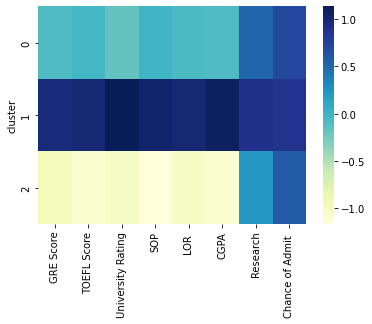

In [37]:
sns.heatmap(df_scale.iloc[:,1:10].groupby(['cluster']).mean(),cmap='YlGnBu')

In [38]:
pd.DataFrame(df_scale['cluster'].value_counts(dropna=False))

,cluster
0,169
1,122
2,109


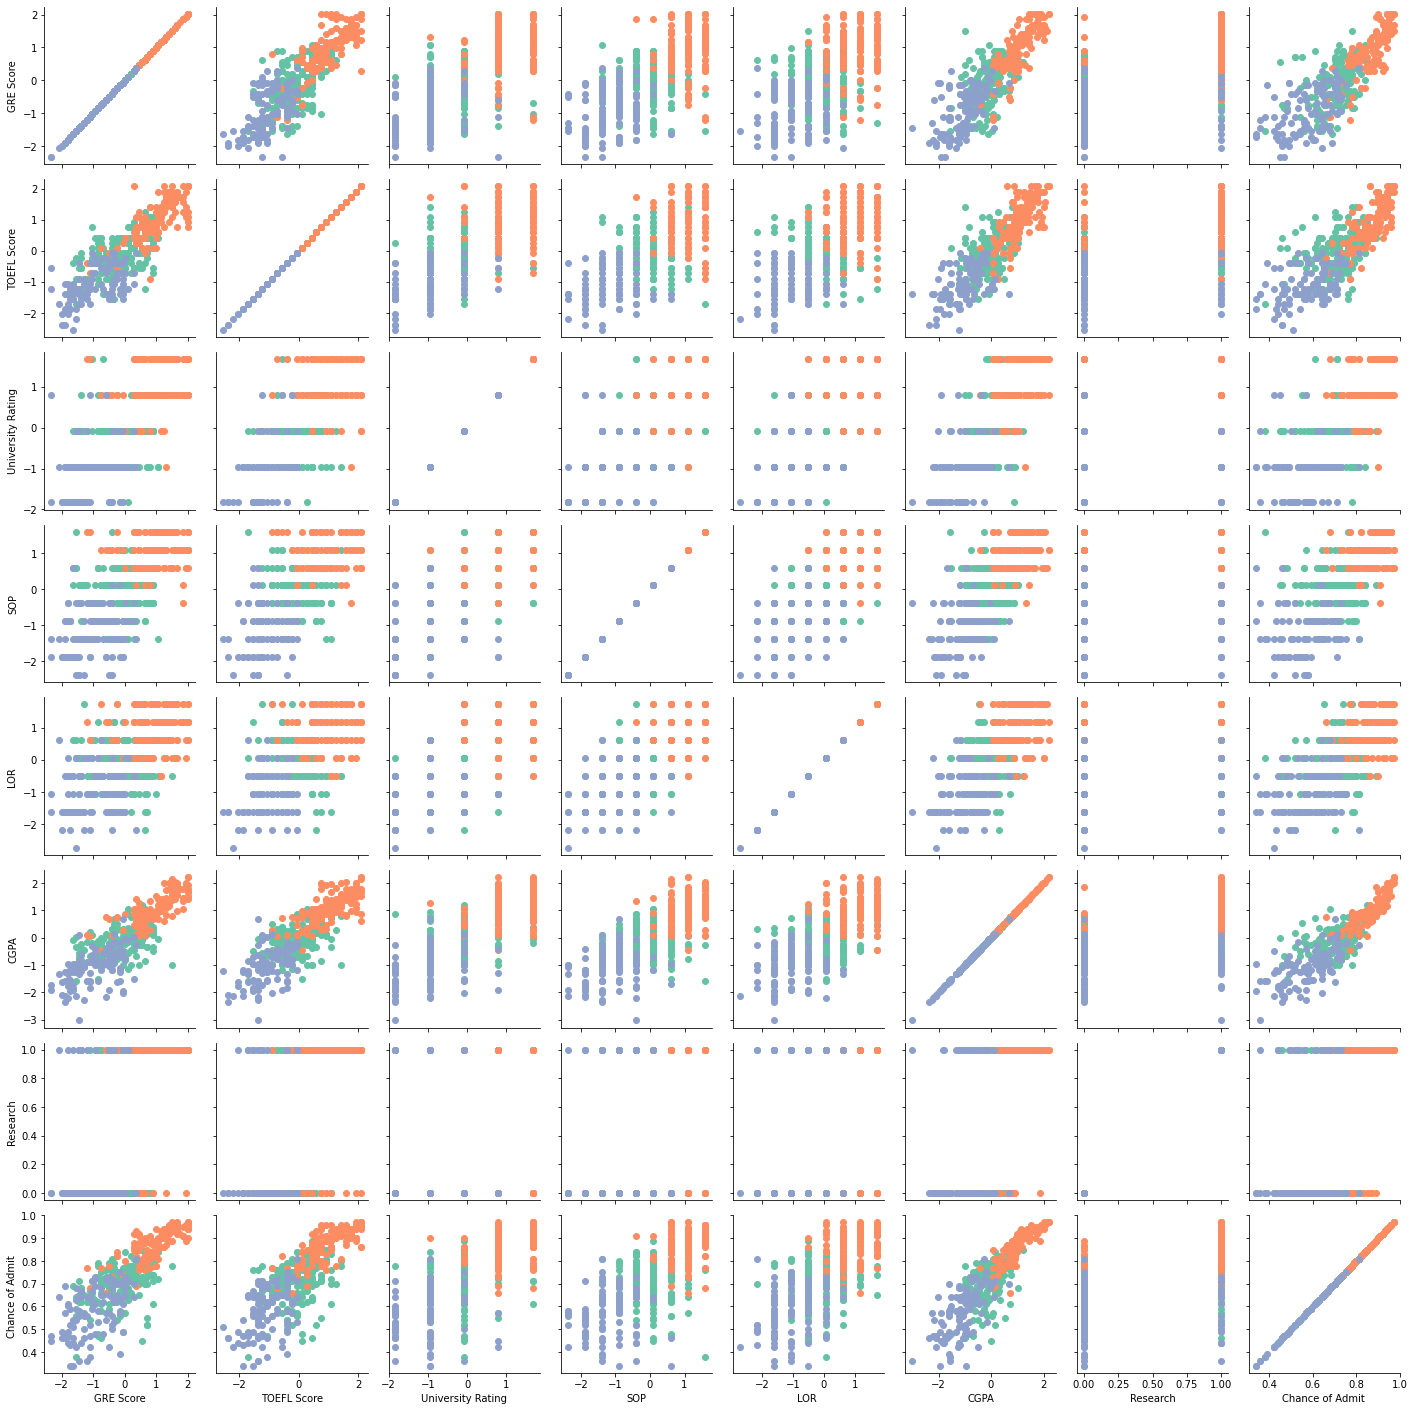

In [40]:
g=sns.PairGrid(df_scale.iloc[:,1:10],hue='cluster',palette='Set2')
g.map(plt.scatter)